In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the JSON file into a DataFrame
users_df = pd.read_csv('../data/takehome_users.csv', encoding='ISO-8859-1')
engagement_df = pd.read_csv('../data/takehome_user_engagement.csv', encoding='ISO-8859-1')

display(users_df.head(5))
display(engagement_df.head(5))

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
print(users_df.shape)
print(users_df.info())
print(users_df.describe())

(12000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None
         object_id  last_session_creation_time  opted_in_to_mailing_list  \
count  12000.00000                8.823000e+03    

In [5]:
print(engagement_df.shape)
print(engagement_df.info())
print(engagement_df.describe())

(207917, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None
             user_id   visited
count  207917.000000  207917.0
mean     5913.314197       1.0
std      3394.941674       0.0
min         1.000000       1.0
25%      3087.000000       1.0
50%      5682.000000       1.0
75%      8944.000000       1.0
max     12000.000000       1.0


In [6]:
# Convert the time_stamp column to datetime format for easier manipulation
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

# Sort the engagement data by user_id and time_stamp
engagement_df.sort_values(by=['user_id', 'time_stamp'], inplace=True)

In [8]:
# Function to identify adopted users
def identify_adopted_users(df):
    adopted_users = set()
    for user_id, group in df.groupby('user_id'):
        unique_days = group['time_stamp'].dt.date.unique()
        for i in range(len(unique_days) - 2):
            if (unique_days[i + 2] - unique_days[i]).days <= 7:
                adopted_users.add(user_id)
                break
    return adopted_users

adopted_user_ids = identify_adopted_users(engagement_df)

# Merge adopted user IDs into the users dataframe
users_df['adopted'] = users_df['object_id'].apply(lambda x: 1 if x in adopted_user_ids else 0)


In [9]:
display(users_df.head())

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


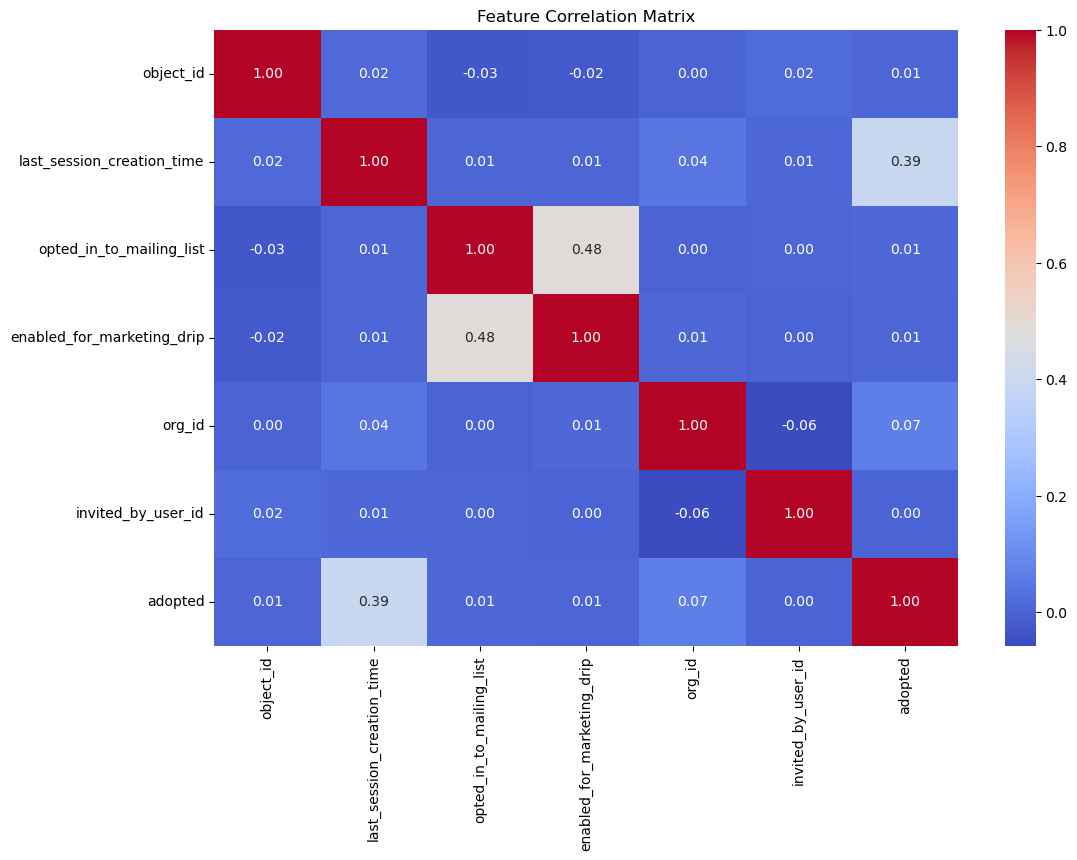

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(users_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Matrix')
plt.show()

In [11]:
adoption_distribution = users_df['adopted'].value_counts(normalize=True)
adoption_by_source = users_df.groupby('creation_source')['adopted'].mean()
adoption_by_marketing_optin = users_df.groupby('opted_in_to_mailing_list')['adopted'].mean()
adoption_by_marketing_drip = users_df.groupby('enabled_for_marketing_drip')['adopted'].mean()
adoption_by_org_id = users_df.groupby('org_id')['adopted'].mean().sort_values(ascending=False)


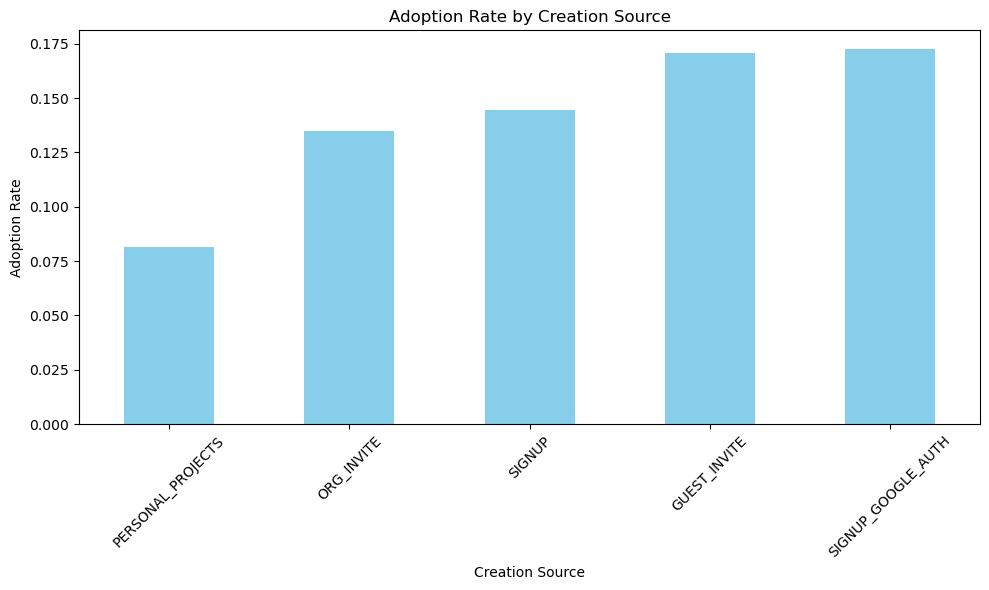

In [12]:
adoption_by_source = users_df.groupby('creation_source')['adopted'].mean()
# Plot the adoption rate by creation source
plt.figure(figsize=(10, 6))
adoption_by_source.sort_values().plot(kind='bar', color='skyblue')
plt.title('Adoption Rate by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

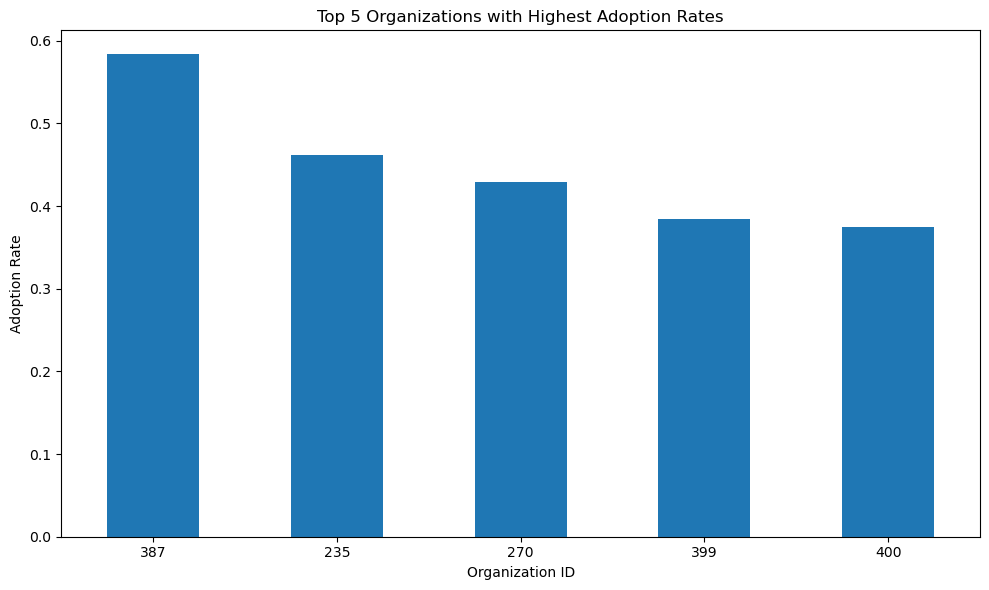

In [15]:

# Plot the top 5 organizations with the highest adoption rates
plt.figure(figsize=(10, 6))
adoption_by_org_id.head().plot(kind='bar')
plt.title('Top 5 Organizations with Highest Adoption Rates')
plt.xlabel('Organization ID')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Key Insights:
 - Creation Source Users signing up through Google Authentication and guest invites exhibit higher adoption rates.Probably this indicates that simplifying the sign-up process or leveraging invitations might enhance user engagement.
 - Certain organizations have significantly higher adoption rates, suggesting that organizational culture or usage patterns may strongly influence individual user adoption

Further Analysis
 - Imbalance: Use techniques such as oversampling adopted users or employing algorithms like Random Forests or Gradient Boosting that handle imbalanced data .

 - Models: Explore  models such as decision trees or ensemble methods, which might better capture the complexity of the data.

 - Feature Engineering: Create additional features that might capture engagement behavior, such as frequency of logins in the first week or interaction with specific product features.